## Linear Regression: Predicting automobile mpg with autompg-csv

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [29]:
autos_df = pd.read_csv('http://bit.ly/autompg-csv')
autos_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [30]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    object 
 8   name    392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [31]:
autos_df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

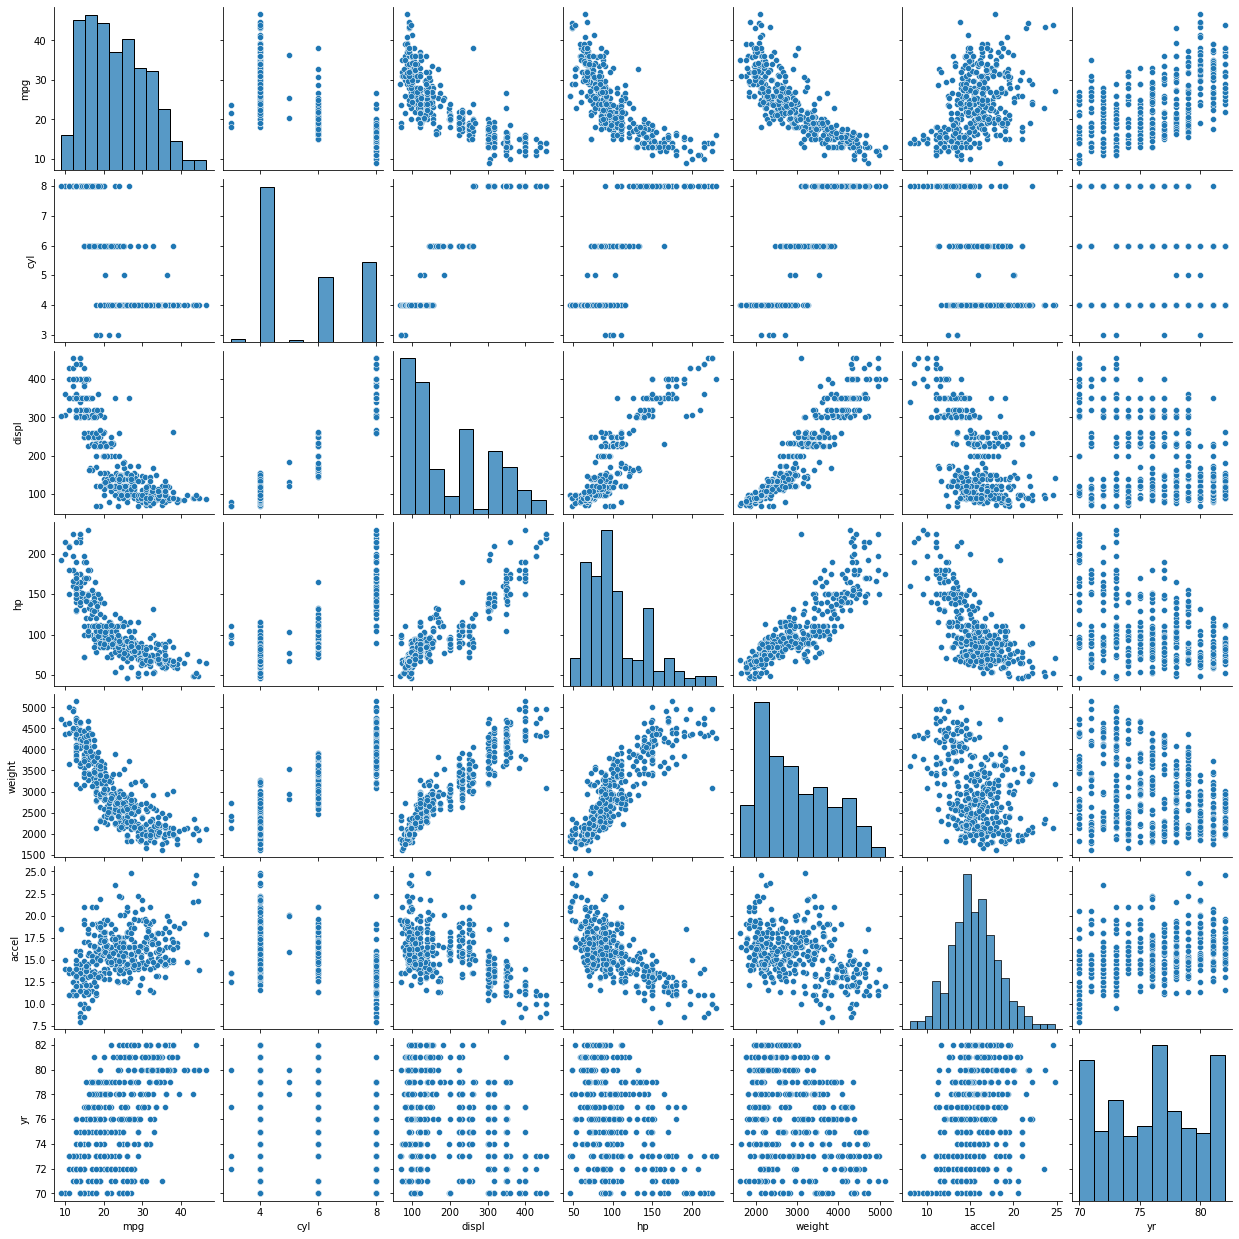

In [32]:
#Pairplot
sns.pairplot(autos_df)

/Users/jwhiteley/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

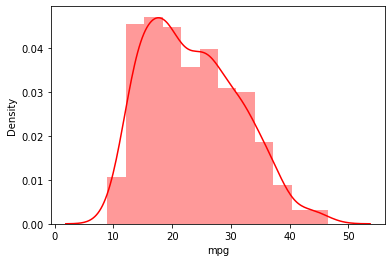

In [33]:
#Distribution plot
sns.distplot(autos_df['mpg'], color='r')

<AxesSubplot:>

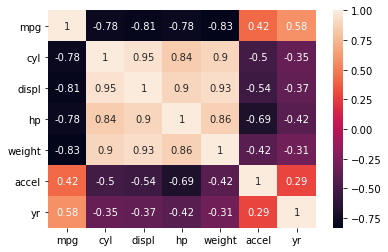

In [34]:
#Heatmap
sns.heatmap(autos_df.corr(), annot=True)

### Training a Linear Regression Model:

In [35]:
#Train Test Split

In [36]:
X = autos_df[['cyl', 'displ', 'hp', 'weight', 'accel', 'yr']]
y = autos_df['mpg']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Creating and Training the Model:

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation:

In [40]:
#print the intercept
print(lm.intercept_)

-16.444341766299896


In [41]:
#Coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cyl,-0.191028
displ,0.005927
hp,0.005249
weight,-0.006855
accel,0.260667
yr,0.731755


Makes sense that yr showed strongest positive correl, as time has gone on fuel efficiency standards have been raised

In [42]:
predictions = lm.predict(X_test)

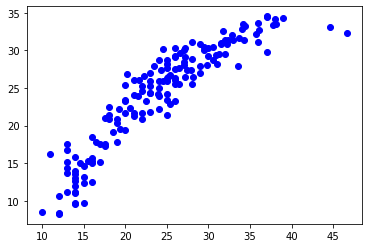

In [43]:
#test how well predictions ran as compared to actual prices (y_test)
plt.scatter(y_test,predictions, c='b')

/Users/jwhiteley/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


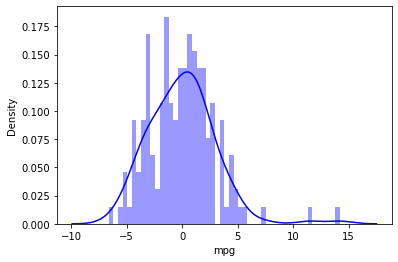

In [44]:
#create a histogram of the residuals - difference between predictions and actual (double-check that)
sns.distplot((y_test-predictions),bins=50, color='b');

Regression Evaluation:

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.285259168325778
MSE: 9.017516557081931
RMSE: 3.002918007052795
